In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu118
     ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
     - -------------------------------------- 0.3/6.2 MB ? eta -:--:--
     - -------------------------------------- 0.3/6.2 MB ? eta -:--:--
     - -------------------------------------- 0.3/6.2 MB ? eta -:--:--
     --- ------------------------------------ 0.5/6.2 MB 493.7 kB/s eta 0:00:12
     ----- ---------------------------------- 0.8/6.2 MB 589.1 kB/s eta 0

   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:20
   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:20
   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:21
   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:20
   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:20
   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:24
   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:25
   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:18
   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:22
   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:22
   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:24
   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:22
   ------ --------------------------------- 0.4/2.7 GB 1.7 MB/s eta 0:22:24
   ------ --

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
   ---------------------------------------- 0.0/978.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/978.8 kB ? eta -:--:--
   --------------------- ------------------ 524.3/978.8 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 978.8/978.8 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0


In [29]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [1]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

Torch version: 2.6.0+cu118
CUDA available: False


In [4]:
#loading the model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') #loading pretrained ultralytics model

C:\Users\sadai\yolov5_env\Lib\site-packages\torch\hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\sadai/.cache\torch\hub\master.zip


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\sadai\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5  2025-4-18 Python-3.12.2 torch-2.6.0+cu118 CPU

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [03:26<00:00, 71.7kB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [9]:
#making detections
img = 'https://media.wired.com/photos/593256b42a990b06268a9e21/master/pass/traffic-jam-getty.jpg'

In [10]:
results=model(img)
results.print()

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 684x1025 61 cars
Speed: 809.8ms pre-process, 269.4ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


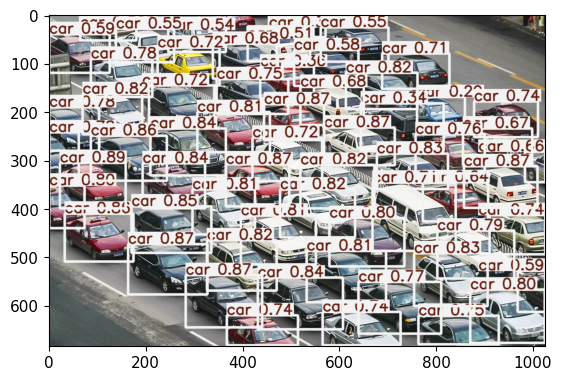

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [16]:
#real time detections
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #making detections
    results = model(frame)
    
    cv2.imshow('YOLO_Frame', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

In [30]:
# training from scratch

import uuid #unique identifier
import os 
import time

In [21]:
IMAGES_PATH = r"C:\Users\sadai\mediapipe\mediapipe_project_2\yolov5\img_data\images" #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [22]:
cap = cv2.VideoCapture(0)

#loop through labels
for label in labels:
    print('Collecting Images for {}'.format(labels))
    time.sleep(5)
    
    #loop through image ranges
    for img_num in range(number_imgs):
        print('Collecting images for {}'.format(label, img_num))
        
        #webCam feed
        ret, frame = cap.read()
        
        #Naming Out image path
        imgname = os.path.join(IMAGES_PATH, label + '.' +str(uuid.uuid1())+ '.jpg')
        #writes out image to file
        cv2.imwrite(imgname, frame)
        
        #Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [23]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [24]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
    --------------------------------------- 0.1/6.9 MB 2.2 MB/s eta 0:00:04
   - -------------------------------------- 0.2/6.9 MB 2.0 MB/s eta 0:00:04
   - -------------------------------------- 0.3/6.9 MB 2.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/6.9 MB 2.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/6.9 MB 2.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/6.9 MB 2.3 MB/s eta 0:00:03
   ----- ---------------------------------- 0.9/6.9 MB 2.7 MB/s eta 0:00:03
   ----- ---------------------------------- 0.9/6.9 MB 2.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.1/6.9 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.1/6.9 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.2/6.9 MB 2.5 MB/s eta 0:00:03
   ------- ---------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# !cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yaml --weights yolov5s.pt --workers 2
!cd yolov5 && python train.py --img 320 --batch 8 --epochs 50 --data dataset.yaml --weights yolov5n.pt --device cpu --workers 0


train: weights=yolov5n.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=cpu, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 3 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-413-gf2f86eb3 Python-3.12.2 torch-2.6.0+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1

In [32]:
#loading the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path = r"C:\Users\sadai\mediapipe\mediapipe_project_2\yolov5\runs\train\exp3\weights\last.pt", force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\sadai/.cache\torch\hub\master.zip
YOLOv5  2025-4-18 Python-3.12.2 torch-2.6.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 1782166 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 


In [34]:
img = os.path.join('data', 'images', r"C:\Users\sadai\mediapipe\mediapipe_project_2\yolov5\img_data\images\awake.c047c333-1c4f-11f0-ae30-8cf8c5a9c3f0.jpg")

In [35]:
results = model(img)

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [36]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 26.0ms pre-process, 183.5ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


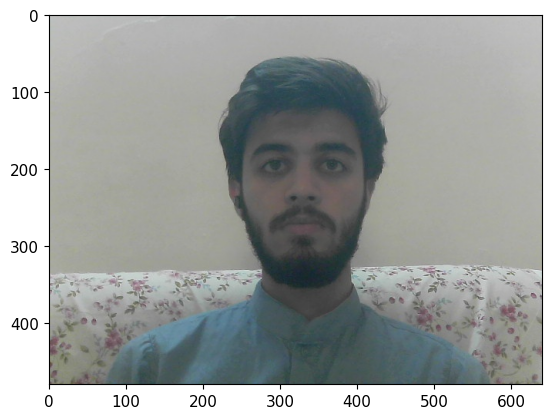

In [37]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [33]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #making detections
    results = model(frame)
    
    cv2.imshow('YOLO_Frame', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\sadai/.cache\torch\hub\master.zip
YOLOv5  2025-4-18 Python-3.12.2 torch-2.6.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 1782166 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 480x640 (no detections)
Speed: 13.3ms pre-process, 191.3ms inference, 14.3ms NMS per image at shape (1, 3, 480, 640)


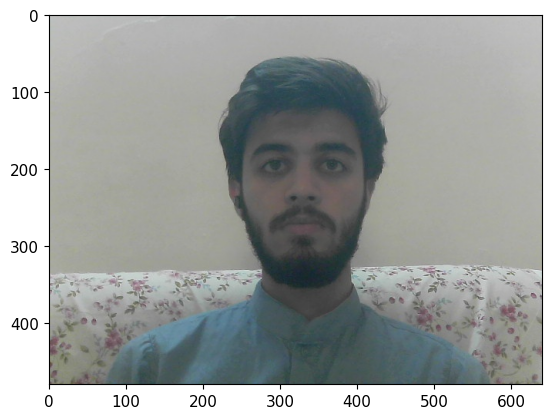

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

In [38]:
import torch
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Loading the custom model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r"C:\Users\sadai\mediapipe\mediapipe_project_2\yolov5\runs\train\exp3\weights\last.pt", force_reload=True)

# Test with a single image
img_path = r"C:\Users\sadai\mediapipe\mediapipe_project_2\yolov5\img_data\images\awake.c047c333-1c4f-11f0-ae30-8cf8c5a9c3f0.jpg"

# Inference on the image
results = model(img_path)

# Print the results
results.print()  # You should see predictions here in the console

# Display the results using matplotlib
%matplotlib inline
plt.imshow(np.squeeze(results.render()))  # Rendered result
plt.show()

# Start webcam and run predictions live
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Convert frame from BGR to RGB (as YOLO expects RGB)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Inference on the frame
    results = model(frame_rgb)

    # Render the results (boxes, labels, and confidences)
    rendered_frame = np.squeeze(results.render())

    # Convert back to BGR for OpenCV (for proper visualization)
    rendered_frame_bgr = cv2.cvtColor(rendered_frame, cv2.COLOR_RGB2BGR)

    # Show the result in a window
    cv2.imshow('YOLO_Frame', rendered_frame_bgr)
    
    # Break on pressing 'q'
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the webcam and close any open windows
cap.release()
cv2.destroyAllWindows()

In [41]:
# Set a confidence threshold (e.g., 0.5)
results = model(img_path)
results = results.pandas().xywh  # Converts results to pandas DataFrame for easier inspection

# Filter results based on confidence (e.g., only keep detections with confidence > 0.5)
filtered_results = results[results['confidence'] > 0.5]
print(filtered_results)

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


TypeError: list indices must be integers or slices, not str

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\sadai/.cache\torch\hub\master.zip
YOLOv5  2025-4-18 Python-3.12.2 torch-2.6.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 1782166 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 480x640 (no detections)
Speed: 19.3ms pre-process, 195.2ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)


No detections found in the image.


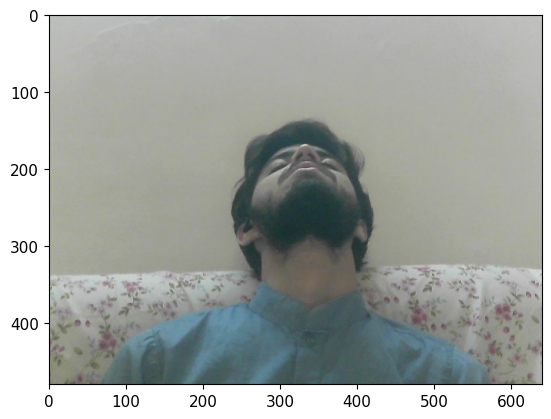

C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sadai/.cache\torch\hub\ultralytics_yolov5_master\models

In [46]:
# Load the trained model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r"C:\Users\sadai\mediapipe\mediapipe_project_2\yolov5\runs\train\exp3\weights\last.pt", force_reload=True)

# Load your test image or frame
img_path = r"C:\Users\sadai\mediapipe\mediapipe_project_2\yolov5\img_data\images\drowsy.eff6ebb9-1c4f-11f0-b06c-8cf8c5a9c3f0.jpg"

# Get predictions
results = model(img_path)

# Print the full results summary
results.print()  # You can use this to check if detections are happening

# Check if detections exist and process accordingly
if results.xywh[0].shape[0] > 0:  # Check if there are any detections (xywh shape > 0)
    # Convert results to pandas DataFrame (xywh for bounding box coordinates)
    df = results.pandas().xywh  # Convert to pandas DataFrame (xywh for bounding box coordinates)

    # Display the DataFrame content (optional)
    print(df.head())

    # Optionally, filter results based on confidence score (e.g., threshold 0.5)
    filtered_results = df[df['confidence'] > 0.5]
    print(filtered_results)
else:
    print("No detections found in the image.")

# Render the detections on the image and show
%matplotlib inline
plt.imshow(np.squeeze(results.render()))  # This will render the image with bounding boxes
plt.show()

# If you want to do this on webcam frames:

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    # Get predictions for the webcam frame
    results = model(frame)  # Pass the frame directly to the model
    
    # Render the results (bounding boxes will be drawn on the frame)
    cv2.imshow('YOLO Frame', np.squeeze(results.render()))  # This will render the bounding boxes
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()